Last edited by Mati-Ullah on Nov 17th, 2017 - 8:07 PM

In [1]:
import numpy as np
import pandas as pd

Importing Data

In [2]:
#Creating Data Frame from Products table(csv) and droping two columns aisle_id, department_id
df_products = pd.read_csv('products.csv')
df_products.drop(['aisle_id','department_id'], axis='columns', inplace=True)
df_products.head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [3]:
#Creating Data Frame from order_products__train table(csv) and droping two columns add_to_cart_order,reordered
#---------------------------------------------------------------------------------------------
#Alternately we can also use prior(csv)
#--------------------------------------------------------------------------------------------
df_order_products__train = pd.read_csv('order_products__train.csv')
df_order_products__train.drop(['add_to_cart_order','reordered'], axis='columns', inplace=True)
df_order_products__train.head()

,order_id,product_id
0,1,49302
1,1,11109
2,1,10246
3,1,49683
4,1,43633


In [4]:
#Merging Product with tran data frame
df_prod_tran=pd.merge(df_products, df_order_products__train)
df_prod_tran.head()

,product_id,product_name,order_id
0,1,Chocolate Sandwich Cookies,6695
1,1,Chocolate Sandwich Cookies,48361
2,1,Chocolate Sandwich Cookies,63770
3,1,Chocolate Sandwich Cookies,75339
4,1,Chocolate Sandwich Cookies,240996


In [5]:
#Creating Data Frame from orders table(csv) and droping two columns user_id, eval_set, order_number,
#                                                                   days_since_prior_order
#---------------------------------------------------------------------------------------------
df_orders = pd.read_csv('orders.csv')
df_orders.drop(['user_id','eval_set','order_number','days_since_prior_order'], axis='columns', inplace=True)
df_orders.head()           

,order_id,order_dow,order_hour_of_day
0,2539329,2,8
1,2398795,3,7
2,473747,3,12
3,2254736,4,7
4,431534,4,15


In [6]:
#Merging Prod_tran with order data frame
df_prod_tran_order=pd.merge(df_prod_tran, df_orders)
df_prod_tran_order.drop(['product_name'], axis='columns', inplace=True)
df_prod_tran_order.head()

,product_id,order_id,order_dow,order_hour_of_day
0,1,6695,1,1
1,130,6695,1,1
2,3298,6695,1,1
3,6184,6695,1,1
4,9007,6695,1,1


In [7]:
#Sale Against DOW
#droping columns product_id, order_hour_of_day
df_dow=df_prod_tran_order.drop(['product_id','order_hour_of_day'], axis='columns')
df_dow_grp=df_dow.groupby(['order_dow']).count()
df_dow_grp.head()

,order_id
order_dow,
0,324026
1,205978
2,160562
3,154381
4,155481


In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [ ]:
#fig=plt.figure()
#ax=fig.add_subplot(1,1,1)
#ax.plot(df_dow_grp,'ko--')
#ax.set_xticklabels(['', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
#                            rotation=30, fontsize='small')
#ax.set_title('Sales for Day of the Week')
#plt.savefig("SalesDOW.png", format="png")

In [9]:
#picking up top 9 products
df_pro=df_prod_tran_order.drop(['order_hour_of_day','order_dow'], axis='columns')
df_groupby_prod=df_pro.groupby(['product_id']).count()
df_groupby_prod.sort_values(by='order_id',ascending=False, na_position='first',inplace=True)
df_select = df_groupby_prod.iloc[:4]
df_select
#dict_Selec_prod
#df_pro_groupby=df_prod_tran_order[df_prod_tran_order['product_id']==6184]

,order_id
product_id,
24852,18726
13176,15480
21137,10894
21903,9784


In [11]:
from pandas.plotting import autocorrelation_plot, scatter_matrix

<IPython.core.display.Javascript object>


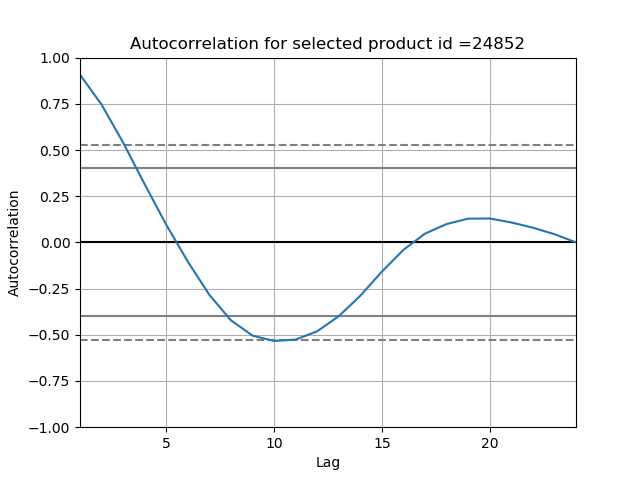

<IPython.core.display.Javascript object>


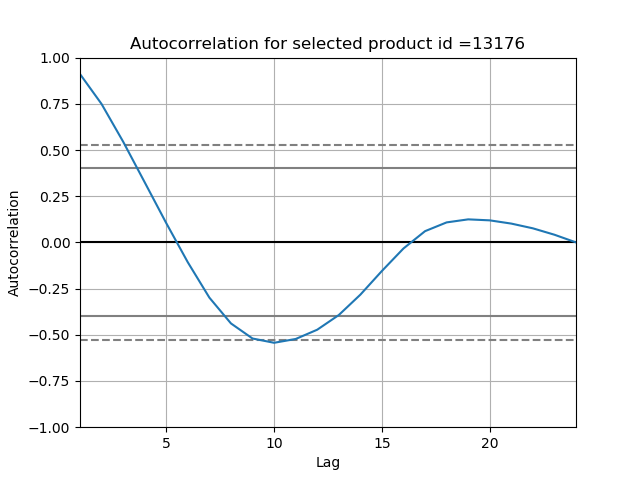

<IPython.core.display.Javascript object>


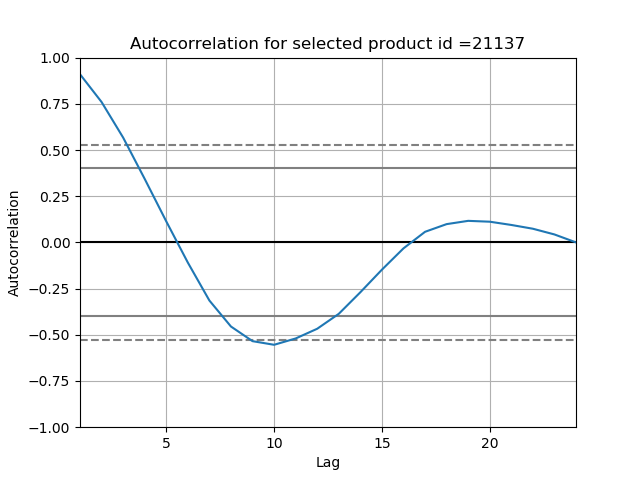

<IPython.core.display.Javascript object>


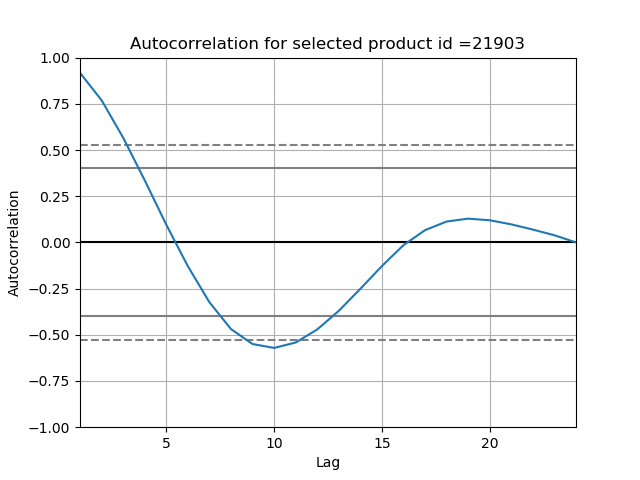

In [23]:
n=1
for j in df_select.index.values:
    df_pro=df_prod_tran_order[df_prod_tran_order['product_id']==j]
    df_pro=df_pro.drop(['product_id','order_dow'], axis='columns')
    df_pro_grp=df_pro.groupby(['order_hour_of_day']).count()
    plt.figure()
    autocorrelation_plot(df_pro_grp)
    str_title = 'Autocorrelation for selected product id =' + str(j)
    plt.title(str_title)
    plt.savefig("Autocorrelation"+str(j)+".pdf", format="pdf")
#ig=plt.figure()
#ax1=fig.add_subplot(2,2,1)
#x2=fig.add_subplot(2,2,2)
#ax3=fig.add_subplot(2,2,3)

In [17]:
#plt.savefig("Autocorrelation.png", format="png")

In [ ]:
#df_pro=df_prod_tran_order[df_prod_tran_order['product_id']==6184]
#df_pro=df_pro.drop(['product_id','order_dow'], axis='columns')
#df_pro
#df_pro_grp=df_pro.groupby(['order_hour_of_day']).count()
#df_pro_grp
#df_orders[df_orders['order_dow']==0].count()

In [ ]:
#Autocorelation
3#from pandas.plotting import autocorrelation_plot, scatter_matrix

In [ ]:
#plt.figure()
#autocorrelation_plot(df_pro_grp)
#plt.title('Autocorrelation for selected product')
#plt.savefig("Autocorrelation.png", format="png")